# Поиск в ориентированных графах

В этом ноутбуке мы разберем поиск в глубину в ориентированных графах и поиск компонент сильной связности

In [1]:
# Задаем граф

import networkx as nx

graph = nx.DiGraph()

graph.add_nodes_from(['A','B','C','D','E','F'])
graph.add_edges_from([('A','B'), 
                      ('B','C'), ('B','D'), ('B','E'), 
                      ('C','A'), 
                      ('D','A'), ('D','C'), ('D','E'), 
                      ('F','E')])

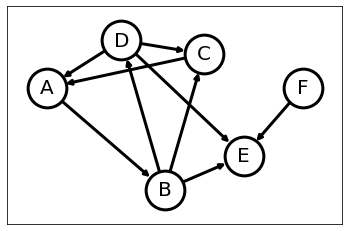

In [2]:
# Рисуем граф примерно как в слайдах

import matplotlib.pyplot as plt

pos = {'A': (1, 1.5), 'B': (4, 0), 'C': (5, 2), 'D': (2.9, 2.2), 'E': (6, 0.5), 'F': (7.5, 1.5)}

def draw_G(G):
    options = {
        "font_size": 20,
        "node_size": 1500,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 3,
        "width": 3,
    }


    
    plt.axis([0, 8.5, -0.5, 2.7])

    nx.draw_networkx(G, pos, **options)
    plt.show()
    
draw_G(graph)

In [3]:
# Реализуем поиск в глубину

clock = 0

pre=dict()
post=dict()

def Previsit(v):
    global clock
    pre[v]=clock
    clock+=1

def Postvisit(v):
    global clock
    post[v]=clock
    clock+=1

visited=dict()
for v in graph:
    visited[v]=False

def Explore(v):
    visited[v]=True
    Previsit(v)
    for u in graph[v]:
        if not visited[u]:
            Explore(u)
    Postvisit(v)
            
def dfs():
    for v in graph:
        if not visited[v]:
            Explore(v)   
            
dfs()

print("Pre: ",pre)
print("Post:",dict(sorted(post.items())))

Pre:  {'A': 0, 'B': 1, 'C': 2, 'D': 4, 'E': 5, 'F': 10}
Post: {'A': 9, 'B': 8, 'C': 3, 'D': 7, 'E': 6, 'F': 11}


In [4]:
# Реализуем поиск в глубину без глобальных переменных

pre={}
post={}

def Previsit(v, pre, clock):
    pre[v]=clock
    clock+=1
    return clock

def Postvisit(v, post, clock):
    post[v]=clock
    clock+=1
    return clock

visited=dict()
for v in graph:
    visited[v]=False

def Explore(v,graph,pre,post,clock,visited):
    visited[v]=True
    clock = Previsit(v,pre,clock)
    for u in graph[v]:
        if not visited[u]:
            clock = Explore(u,graph,pre,post,clock,visited)
    clock = Postvisit(v,post,clock)
    return clock
            
def dfs(graph,pre,post,visited):
    clock=0
    for v in graph:
        if not visited[v]:
            clock = Explore(v,graph,pre,post,clock,visited)

dfs(graph,pre,post,visited)

print("Pre: ",sorted(pre.items()))
print("Post:",sorted(post.items()))

Pre:  [('A', 0), ('B', 1), ('C', 2), ('D', 4), ('E', 5), ('F', 10)]
Post: [('A', 9), ('B', 8), ('C', 3), ('D', 7), ('E', 6), ('F', 11)]


In [5]:
# Находим компоненты сильной связности с помощью встроенной функции

list(nx.strongly_connected_components(graph))

[{'E'}, {'A', 'B', 'C', 'D'}, {'F'}]

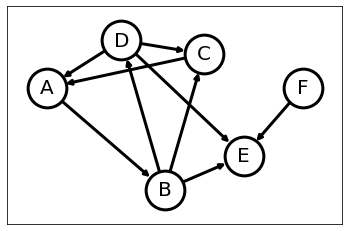

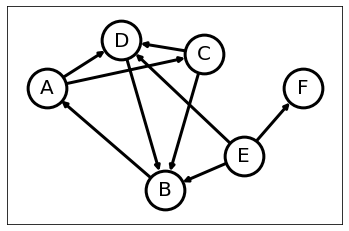

Pre для обратного графа:	 {'A': 0, 'B': 2, 'C': 1, 'D': 4, 'E': 8, 'F': 9}
Post для обратного графа:	 {'A': 7, 'B': 3, 'C': 6, 'D': 5, 'E': 11, 'F': 10}

Очередная компонента состоит из: E 
Очередная компонента состоит из: F 
Очередная компонента состоит из: A B C D 


In [6]:
# Находим компоненты сильной связности

graph_r = graph.reverse(copy=True)


draw_G(graph)
draw_G(graph_r)

# Запускаем поиск в глубину для развернутого графа
pre_r={}
post_r={}
visited_r={}
for v in graph_r:
    visited_r[v]=False
dfs(graph_r,pre_r,post_r,visited_r)

print("Pre для обратного графа:\t",dict(sorted(pre_r.items())))
print("Post для обратного графа:\t",dict(sorted(post_r.items())))
print()

visited={}
for v in graph:
    visited[v]=False

# Запускаем обход компонент связности
while post_r:
    print("Очередная компонента состоит из:",end=" ")
    pre={}
    post={}

    current_v = max(post_r, key=post_r.get)
    Explore(current_v,graph,pre,post,0,visited)
    
    for k, v in visited.items():
        if v and k in post_r:
            print(k,end=" ")
            del post_r[k]
    #print(visited)
    print()